<h2><center>MNIST classification using <i>LeNet5</i></center></h2>

# Importing Keras



In [1]:
# Importing the Keras main module relying on tensorflow backend
import tensorflow as tf
import keras
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.20.0
Using keras version 3.12.0


# Loading and preparing the MNIST dataset
Load the MNIST dataset made available by keras.datasets
Verify the amount of system memory available before and after loading the dataset.

In [2]:
#@title
# The MNSIT dataset is ready to be imported from Keras into RAM
# Warning: you cannot do that for larger databases (e.g., ImageNet
from keras.datasets import mnist
# START CODE HERE
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# END CODE HERE

Turn train and test labels to one-hot encoding

In [3]:
# Turning the lables into one-hot format
from keras.utils import to_categorical
# START CODE HERE
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# END CODE HERE

Reshape train and test images so that they follow the NWHC ordering required by the TF backend. Then, after casting the pixels to floats, normalize the images so that they have zero-mean and unitary deviation

In [4]:
# Reshaping the images to NWHC scheme
img_rows, img_cols = x_train.shape[1], x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
# START CODE HERE
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
# END CODE HERE

# Cast pixels from uint8 to float32
# START CODE HERE
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# END CODE HERE

# Now let us normalize the images so that they have zero mean and standard deviation
# Hint: are real testing data statistics known at training time ?
# START CODE HERE
mean = x_train.mean()
std = x_train.std()
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std
# END CODE HERE

# Defining the neural network architecture (i.e., the network model)
Create a LeNet5-like convolutional neural network taking in input the images as matrices of pixels and suitable to classify each image across 10 different classes.

In [9]:
# The Sequential module is sort of a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten, Convolution2D, MaxPooling2D

input_shape = (img_rows, img_cols, 1)
output_shape = (10,)

# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (5, 5)
# Number of filters in first convolutional layer
num_kernel_first_conv_layer = 6
# Number of filters in second convolutional layer
num_kernel_second_conv_layer = 16

# START CODE HERE
model = Sequential()
model.add(Convolution2D(num_kernel_first_conv_layer, kernel_size, activation='sigmoid', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Convolution2D(num_kernel_second_conv_layer, kernel_size, activation='sigmoid'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Flatten())
model.add(Dense(120, activation='sigmoid'))
model.add(Dense(84, activation='sigmoid'))
model.add(Dense(output_shape[0], activation='softmax'))
# END CODE HERE

c:\Users\juann\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Instantiate a SGD optimizer with a tentative LR of 10^-2 and using the appropriate loss function and compile the model.

In [ ]:
# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to the computed error gradints
from keras import optimizers

# START CODE HERE
optimizer = optimizers.SGD(learning_rate=10e-2)
model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# END CODE HERE

# We can now have a look at the defined model topology
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

# Training the network - fit()

In [11]:
# This is where the actual training-testing happens
# Dimension of the batch size (number of images over which error gradients are averaged)
batch_size = 20
# Number of epochs we want to train
epochs = 10
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - accuracy: 0.4683 - loss: 1.4973 - val_accuracy: 0.8974 - val_loss: 0.3425
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - accuracy: 0.9335 - loss: 0.2256 - val_accuracy: 0.9533 - val_loss: 0.1575
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 35s 12ms/step - accuracy: 0.9614 - loss: 0.1270 - val_accuracy: 0.9670 - val_loss: 0.1061
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 35s 12ms/step - accuracy: 0.9707 - loss: 0.0951 - val_accuracy: 0.9769 - val_loss: 0.0818
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - accuracy: 0.9767 - loss: 0.0780 - val_accuracy: 0.9758 - val_loss: 0.0777
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - accuracy: 0.9793 - loss: 0.0678 - val_accuracy: 0.9826 - val_loss: 0.0577
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - accuracy: 0.9818 - loss: 0.0605 - val_accuracy: 0.9813 - val_loss: 0.0568
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - accuracy: 0.9831 -

# Visualizing the network performance
Visualize the training history using the pyplot package: plot in one graph the train and vaidation loss functions, in another graph the train and validation accuracy

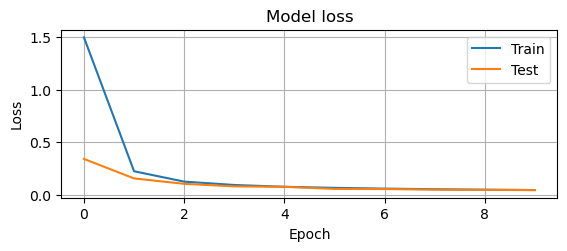

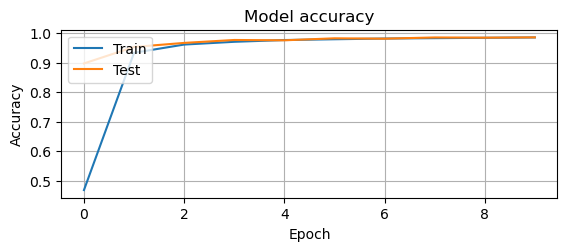

In [12]:
# We now want to plot the train and validation loss functions and accuracy curves
import matplotlib.pyplot as plt
# summarize history for loss
# START CODE HERE
plt.figure()

plt.subplot(2, 1, 1)
plt.grid(visible=True)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE
plt.subplot(2, 1, 2)
plt.grid(visible=True)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
# END CODE HERE
plt.show()


# Experiments

Note down the performance of the trained network in terms of training and validation accuracy as a reference. Then, experiment as follow and compare performance with the reference scenario.

*   **Hidden layers activations**: experiment replacing sigmoids with ReLUs.
*   **Filter size**: experiment with (stacks of) square filters of size 3x3 so to obtain equivalent filters 5x5.
*   **Number of filters**: experiment increasing the number of filters in the first and second layer and find the maximum number of filters the network can tolerate before overfitting to the training samples.
* **Pooling-less architectures**: Modify the network architecture to obtain a twofold reduction of each featuremap without resorting to pooling layers (hint: take insipiration from ResNet).
* **Confusion analysis**: Using the proper metric  from sklearn, check which character is most frequently confused with which: can you explain why ?



$$\bold{\text{Solution}}$$

Save the performance of our original CNN:

In [13]:
ground_loss = history.history['val_loss'][-1]
ground_accuracy = history.history['val_accuracy'][-1]

### __Hidden Layers Activations__

In [18]:
pool_size = (2, 2)
kernel_size = (5, 5)
num_kernel_first_conv_layer = 6
num_kernel_second_conv_layer = 16

model = Sequential()
model.add(Convolution2D(num_kernel_first_conv_layer, kernel_size, activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Convolution2D(num_kernel_second_conv_layer, kernel_size, activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(output_shape[0], activation='softmax'))

optimizer = optimizers.SGD(learning_rate=10e-2)
model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history_hla=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 36s 11ms/step - accuracy: 0.9484 - loss: 0.1677 - val_accuracy: 0.9829 - val_loss: 0.0572
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - accuracy: 0.9799 - loss: 0.0666 - val_accuracy: 0.9818 - val_loss: 0.0575
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.9855 - loss: 0.0501 - val_accuracy: 0.9856 - val_loss: 0.0422
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - accuracy: 0.9867 - loss: 0.0420 - val_accuracy: 0.9871 - val_loss: 0.0477
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.9896 - loss: 0.0342 - val_accuracy: 0.9889 - val_loss: 0.0443
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.9904 - loss: 0.0310 - val_accuracy: 0.9882 - val_loss: 0.0386
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - accuracy: 0.9905 - loss: 0.0293 - val_accuracy: 0.9877 - val_loss: 0.0439
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 33s 11ms/step - accuracy: 0.9913 -

In [20]:
hla_loss = history_hla.history['val_loss'][-1]
hla_accuracy = history_hla.history['val_accuracy'][-1]

print(f"The difference of the final validation loss is {ground_loss - hla_loss}")
print(f"The difference of the final validation accuracy is {ground_accuracy - hla_accuracy}")

The difference of the final validation loss is -0.002506338059902191
The difference of the final validation accuracy is -0.002299964427947998


### __Filter size__

First we do the math: a $5\times5$ kernell has a receptive field of 25 pixels on the image, ($5$ on each direction).We see that with only one $3\times3$ kernell we have a $3$-receptive field on each directions, as we want it to be $5$ we use another layer of conv $3\times3$ (We use ReLu as activation for performance):  


In [25]:
pool_size = (2, 2)
kernel_size = (3, 3)
num_kernel_first_conv_layer = 6
num_kernel_second_conv_layer = 16

model = Sequential()

model.add(Convolution2D(num_kernel_first_conv_layer, 
                        kernel_size, activation='relu', 
                        input_shape=input_shape,padding='same'))
model.add(Convolution2D(num_kernel_first_conv_layer, 
                        kernel_size, activation='relu'
                        ,padding='same'))

model.add(MaxPooling2D(pool_size=pool_size))

model.add(Convolution2D(num_kernel_second_conv_layer, 
                        kernel_size, activation='relu',
                        padding='same'))
model.add(Convolution2D(num_kernel_second_conv_layer, 
                        kernel_size, activation='relu',
                        padding='same'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(output_shape[0], activation='softmax'))

optimizer = optimizers.SGD(learning_rate=10e-2)
model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history_fs=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 54s 17ms/step - accuracy: 0.9437 - loss: 0.1797 - val_accuracy: 0.9756 - val_loss: 0.0831
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 51s 17ms/step - accuracy: 0.9826 - loss: 0.0577 - val_accuracy: 0.9858 - val_loss: 0.0480
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 61s 20ms/step - accuracy: 0.9867 - loss: 0.0438 - val_accuracy: 0.9874 - val_loss: 0.0421
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9883 - loss: 0.0380 - val_accuracy: 0.9890 - val_loss: 0.0364
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9916 - loss: 0.0271 - val_accuracy: 0.9786 - val_loss: 0.0698
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9923 - loss: 0.0245 - val_accuracy: 0.9904 - val_loss: 0.0346
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9927 - loss: 0.0230 - val_accuracy: 0.9873 - val_loss: 0.0395
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9933 -

In [27]:
fs_loss = history_fs.history['val_loss'][-1]
fs_accuracy = history_fs.history['val_accuracy'][-1]

print(f"The difference of the final validation loss is {ground_loss - fs_loss}")
print(f"The difference of the final validation accuracy is {ground_accuracy - fs_accuracy}")

The difference of the final validation loss is 0.006455730646848679
The difference of the final validation accuracy is -0.003399968147277832


### __Number of filters__

We propose the following function:

In [ ]:
def overfiting(num_filters, margin= 10e-3):
    pool_size = (2, 2)
    kernel_size = (5, 5)
    
    num_kernel_first_conv_layer = num_filters
    num_kernel_second_conv_layer = int(num_filters * (16/6))

    model = Sequential()
    model.add(Convolution2D(num_kernel_first_conv_layer, kernel_size, activation='sigmoid', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Convolution2D(num_kernel_second_conv_layer, kernel_size, activation='sigmoid'))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dense(120, activation='sigmoid'))
    model.add(Dense(84, activation='sigmoid'))
    model.add(Dense(output_shape[0], activation='softmax'))

    optimizer = optimizers.SGD(learning_rate=10e-2)
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    history_of=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    
    train_loss = history_of.history['loss']
    val_loss = history_of.history['val_loss']
    
    val_increasing = False
    if len(val_loss) >= 2:
        val_increasing = all(val_loss[i] < val_loss[i+1] 
                           for i in range(-2, -1))
    
    if  val_increasing and (train_loss[-1] + margin < val_loss[-1]):
        print(f"Overfiting detected with {num_filters} filters \n Loss diference {train_loss[-1]-val_loss[-1]}")
    else:
        print(f"No overfiting detected with {num_filters} filters \n Loss diference {train_loss[-1]-val_loss[-1]}")


In [34]:
overfiting(8)

c:\Users\juann\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.3873 - loss: 1.6997 - val_accuracy: 0.8900 - val_loss: 0.3703
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - accuracy: 0.9353 - loss: 0.2240 - val_accuracy: 0.9585 - val_loss: 0.1321
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 55s 18ms/step - accuracy: 0.9625 - loss: 0.1230 - val_accuracy: 0.9723 - val_loss: 0.0905
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 50s 17ms/step - accuracy: 0.9719 - loss: 0.0921 - val_accuracy: 0.9764 - val_loss: 0.0811
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9775 - loss: 0.0745 - val_accuracy: 0.9786 - val_loss: 0.0692
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.9805 - loss: 0.0636 - val_accuracy: 0.9832 - val_loss: 0.0515
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.9833 - loss: 0.0563 - val_accuracy: 0.9816 - val_loss: 0.0570
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.9841 -

In [36]:
overfiting(12)

c:\Users\juann\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 44s 14ms/step - accuracy: 0.4685 - loss: 1.4905 - val_accuracy: 0.9151 - val_loss: 0.2954
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.9429 - loss: 0.1954 - val_accuracy: 0.9645 - val_loss: 0.1142
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - accuracy: 0.9688 - loss: 0.1059 - val_accuracy: 0.9737 - val_loss: 0.0803
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - accuracy: 0.9766 - loss: 0.0778 - val_accuracy: 0.9803 - val_loss: 0.0618
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - accuracy: 0.9807 - loss: 0.0631 - val_accuracy: 0.9760 - val_loss: 0.0743
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.9833 - loss: 0.0545 - val_accuracy: 0.9844 - val_loss: 0.0475
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.9851 - loss: 0.0476 - val_accuracy: 0.9878 - val_loss: 0.0429
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - accuracy: 0.9873 -

### __Confusion analysis__

In [ ]:
# Example of a confusion matrix using sklearn.metrics
from sklearn.metrics import confusion_matrix
predictions = model.predict(...)
# START CODE HERE
...
# END CODE HERE
print (matrix)

# Saving the training results

Save the best trained model (topology, parameters), and all the related side information required to deploy the trained model later on.

In [ ]:
# Create a directory for saving both the trained model and side information
import os
save_dir = os.path.join(os.getcwd(), 'trained_lenet5_mnist')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

# Save model and weights
# START CODE HERE
...
# END CODE HERE
print('Saved trained model at %s ' % model_path)

# Saving mean and standard deviation information as a CSV file
import csv
# START CODE HERE
...
# END CODE HERE
print('Saved side information at %s ' % model_path)